In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import glob
import csv

In [3]:
# filenames = glob.glob('datasets_graphing/*.csv') # use if the order of sets is not important
files = ['linearly_separable', 'skewed_distribution', 'balanced_positive_clusters', 'unbalanced_positive_clusters', 
             'overlapping', 'plus_shaped']
filenames = [f'datasets_graphing/{name}.csv' for name in files]


dfs = [pd.read_csv(open(name)) for name in filenames]

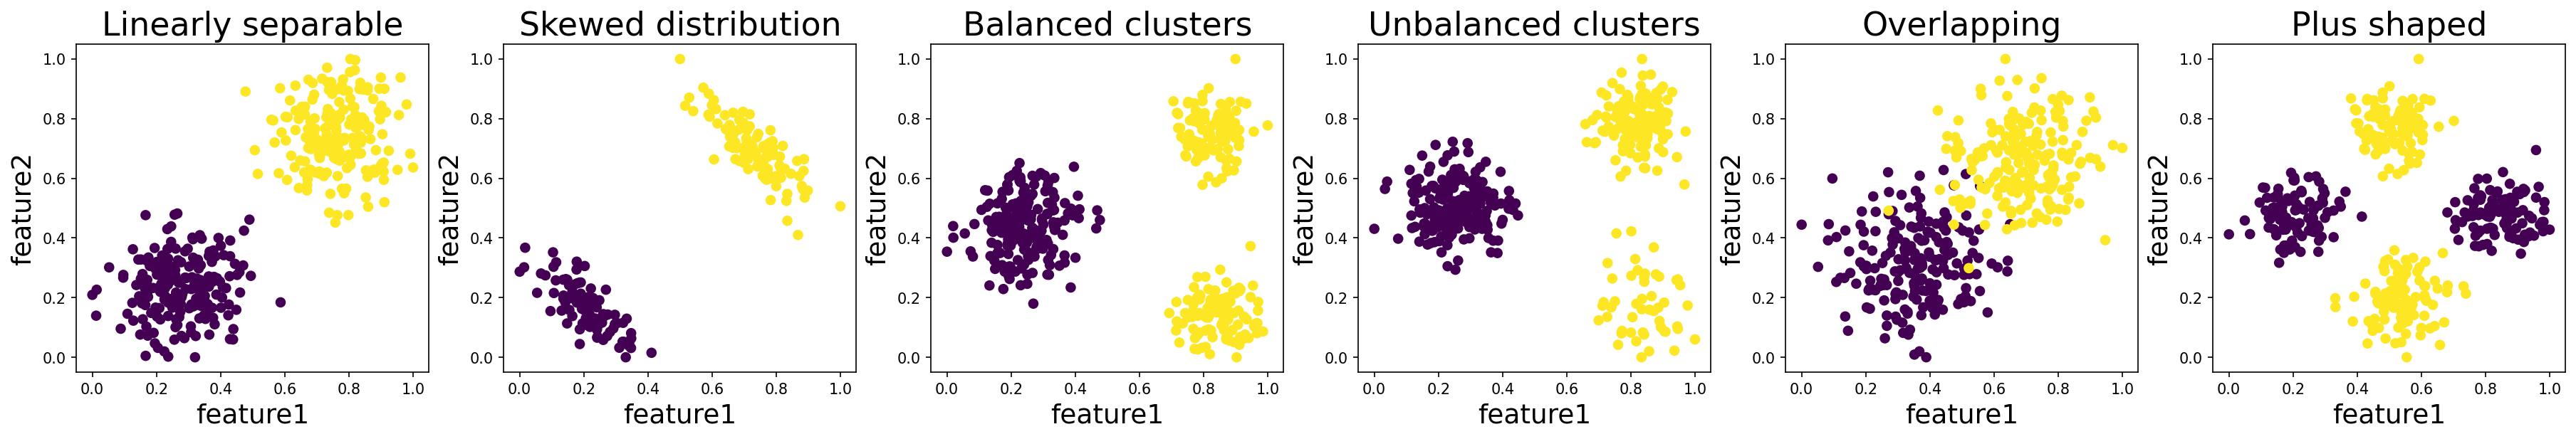

In [5]:
ncols, nrows = len(files), 1

fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(4*ncols, 4*nrows), dpi=150,
                        constrained_layout=True)

for i, df in enumerate(dfs):
    for feature in ['feature1', 'feature2']:
        df[feature] = (df[feature] - df[feature].min()) / (df[feature].max() - df[feature].min())
    ax = axs[i]
    ax.scatter(df['feature1'], df['feature2'], c=df['target'])
    ax.set_xlabel('feature1', size=18)
    ax.set_ylabel('feature2', size=18)
    ax.set_title(files[i].replace('_', ' ').replace(' positive', '').capitalize(), size=22)
    
fig.savefig('images/datasets.png')